In [11]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [40]:

csv_paths: list[str] = sorted(glob.glob("*.csv"))

all_dfs: list[pd.DataFrame] = []

running_epoch: int = 0
for path in csv_paths:
    # Read each CSV file into a DataFrame
    _df: pd.DataFrame = pd.read_csv(path)
    
    # Update EPOCH based on the index (so it's continuous across files)
    _df["EPOCH"] = _df.index + running_epoch
    print(_df["EPOCH"].to_list())
    # Update the running_epoch to the maximum index + 1 to continue from the next run
    running_epoch = _df["EPOCH"].max() + 1  # Adding 1 to avoid overlap for the next file
    
    # Append the updated DataFrame to the list
    all_dfs.append(_df)

# Concatenate all DataFrames into one final DataFrame
df: pd.DataFrame = pd.concat(all_dfs, ignore_index=True)

# Optionally, set 'EPOCH' as the index if needed
df.set_index('EPOCH', inplace=True)





[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [41]:
df

,TIME,TRAIN_ACC,VAL_ACC,TRAIN_LOSS,VAL_LOSS,LR
EPOCH,,,,,,
0,2025-01-16-01-32-37,0.139706,0.159420,0.122044,0.140261,0.001
1,2025-01-16-01-32-53,0.187500,0.159420,0.121228,0.142008,0.001
2,2025-01-16-01-33-10,0.209559,0.188406,0.119119,0.141529,0.001
3,2025-01-16-01-33-27,0.246324,0.217391,0.117327,0.134960,0.001
4,2025-01-16-01-33-43,0.246324,0.333333,0.114123,0.127547,0.001
...,...,...,...,...,...,...
1925,2025-01-16-10-28-11,0.827206,0.971014,0.030938,0.007737,0.001
1926,2025-01-16-10-28-27,0.849265,0.971014,0.026386,0.006913,0.001
1927,2025-01-16-10-28-45,0.863971,0.985507,0.026766,0.007628,0.001


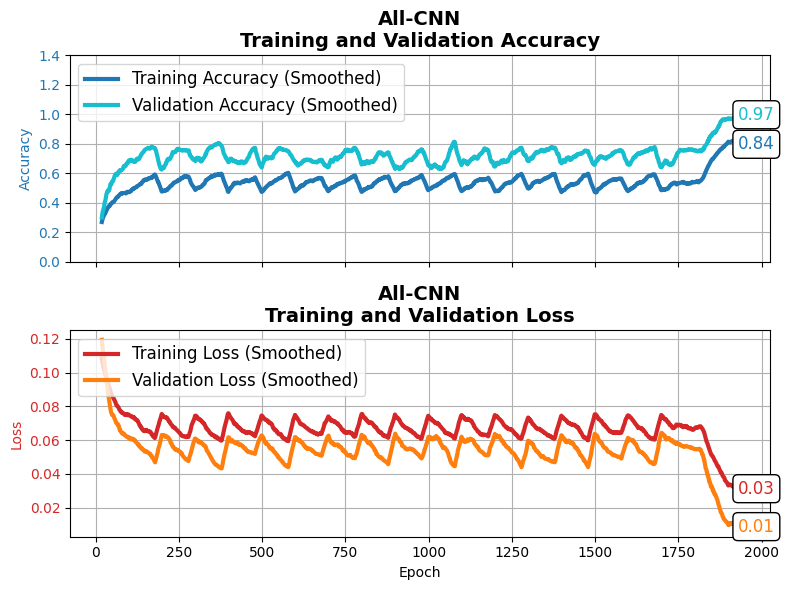

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patheffects

# Apply a rolling mean to smooth the lines (moving average)
window_size = 20  # You can adjust this size based on how smooth you want the lines
df['TRAIN_ACC_SMOOTH'] = df['TRAIN_ACC'].rolling(window=window_size).mean()
df['VAL_ACC_SMOOTH'] = df['VAL_ACC'].rolling(window=window_size).mean()
df['TRAIN_LOSS_SMOOTH'] = df['TRAIN_LOSS'].rolling(window=window_size).mean()
df['VAL_LOSS_SMOOTH'] = df['VAL_LOSS'].rolling(window=window_size).mean()

# Create the plot with stacked subplots: accuracy above loss
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Function to add black outline to the lines
def add_outline(line, linewidth=3, outline_color='black', outline_width=1):
    # Adding outline effect to the line
    line.set_path_effects([patheffects.withStroke(linewidth=outline_width, foreground=outline_color)])

# Plotting accuracy in the top subplot with smoothed data
ax1.set_ylabel('Accuracy', color='tab:blue')
train_acc_line, = ax1.plot(df.index, df['TRAIN_ACC_SMOOTH'], label='Training Accuracy (Smoothed)', color='tab:blue', linestyle='-', linewidth=3, zorder=3)
val_acc_line, = ax1.plot(df.index, df['VAL_ACC_SMOOTH'], label='Validation Accuracy (Smoothed)', color='tab:cyan', linestyle='-', linewidth=3, zorder=3)

# Add black outlines to the accuracy lines for higher contrast
add_outline(train_acc_line, linewidth=3)
add_outline(val_acc_line, linewidth=3)

# Add text boxes at the final points
final_train_acc = df['TRAIN_ACC_SMOOTH'].iloc[-1]
final_val_acc = df['VAL_ACC_SMOOTH'].iloc[-1]
ax1.text(df.index[-1], final_train_acc*0.95, f'{final_train_acc:.2f}', color='tab:blue', ha='left', va='center', fontsize=12, 
         backgroundcolor='white', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
ax1.text(df.index[-1], final_val_acc*1.025, f'{final_val_acc:.2f}', color='tab:cyan', ha='left', va='center', fontsize=12, 
         backgroundcolor='white', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('All-CNN\nTraining and Validation Accuracy', fontsize=14, fontweight='bold')
ax1.grid(True)
ax1.set_ylim((0, 1.4))  # Keep this limit to allow space for text boxes and the legend

# Plotting loss in the bottom subplot with smoothed data
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss', color='tab:red')
train_loss_line, = ax2.plot(df.index, df['TRAIN_LOSS_SMOOTH'], label='Training Loss (Smoothed)', color='tab:red', linestyle='-', linewidth=3, zorder=3)
val_loss_line, = ax2.plot(df.index, df['VAL_LOSS_SMOOTH'], label='Validation Loss (Smoothed)', color='tab:orange', linestyle='-', linewidth=3, zorder=3)

# Add black outlines to the loss lines for higher contrast
add_outline(train_loss_line, linewidth=3)
add_outline(val_loss_line, linewidth=3)

# Add text boxes at the final points for loss
final_train_loss = df['TRAIN_LOSS_SMOOTH'].iloc[-1]
final_val_loss = df['VAL_LOSS_SMOOTH'].iloc[-1]
ax2.text(df.index[-1], final_train_loss*1.05, f'{final_train_loss:.2f}', color='tab:red', ha='left', va='center', fontsize=12, 
         backgroundcolor='white', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
ax2.text(df.index[-1], final_val_loss*1.05, f'{final_val_loss:.2f}', color='tab:orange', ha='left', va='center', fontsize=12, 
         backgroundcolor='white', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_title('All-CNN\nTraining and Validation Loss', fontsize=14, fontweight='bold')
ax2.grid()

# Layout adjustment
fig.tight_layout()

# Show the plot with legends
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)

plt.show()



In [16]:
df

,TIME,EPOCH,TRAIN_ACC,VAL_ACC,TRAIN_LOSS,VAL_LOSS,LR
0,2025-01-16-01-32-37,0,0.139706,0.159420,0.122044,0.140261,0.001
1,2025-01-16-01-32-53,1,0.187500,0.159420,0.121228,0.142008,0.001
2,2025-01-16-01-33-10,2,0.209559,0.188406,0.119119,0.141529,0.001
3,2025-01-16-01-33-27,3,0.246324,0.217391,0.117327,0.134960,0.001
4,2025-01-16-01-33-43,4,0.246324,0.333333,0.114123,0.127547,0.001
...,...,...,...,...,...,...,...
113,2025-01-16-10-28-11,113,0.827206,0.971014,0.030938,0.007737,0.001
114,2025-01-16-10-28-27,114,0.849265,0.971014,0.026386,0.006913,0.001
115,2025-01-16-10-28-45,115,0.863971,0.985507,0.026766,0.007628,0.001
116,2025-01-16-10-29-01,116,0.860294,1.000000,0.024372,0.003161,0.001
